In [1]:
import pandas as pd

In [2]:
url = 'http://www.seoul.go.kr/coronaV/coronaStatus.do'
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [3]:
table = pd.read_html(url)
len(table)

5

In [4]:
table[0]

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구
0,175,183,315,317,298,432,489,590,280,420,585,529,368
1,+2,+7,+2,+5,+8,+12,+4,+9,+11,+7,+7,+14,+10
2,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
3,440,459,988,373,185,435,593,742,638,720,808,416,879
4,+9,+6,+32,+9,+3,+7,+18,+17,+3,+18,+13,+9,+9


In [5]:
table[3]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [6]:
import requests

In [7]:
url = "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1'

In [8]:
url = url + "&order%5B0%5D%5Bdir%5D=desc&start=100&length=1000"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&order%5B0%5D%5Bdir%5D=desc&start=100&length=1000'

In [9]:
response = requests.get(url)
data_json = response.json()

In [10]:
records_total = data_json['recordsTotal']
records_total

12657

In [11]:
end_page = round(records_total / 100) + 1
end_page

128

In [12]:
data = data_json["data"]

In [13]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6
0,<p class='corona19_no'>12657</p>,43494,12.14.,동대문구,-,기타 확진자 접촉,<b class=''></b>
1,<p class='corona19_no'>12656</p>,43495,12.14.,관악구,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>12655</p>,44350,12.14.,강서구,-,기타 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>12654</p>,44335,12.14.,광진구,-,동부구치소 관련,<b class=''></b>
4,<p class='corona19_no'>12653</p>,44334,12.14.,광진구,-,기타 확진자 접촉,<b class=''></b>


In [14]:
def get_seoul_covid19_100(page_no):
    """
    page_no : 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
    start_no : 입력받은 page_no로 
    """
    start_no = (page_no - 1) * 100
    url = f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw={page_no}"
    url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
    response = requests.get(url)
    data_json = response.json()
    return data_json

In [15]:
get_seoul_covid19_100(1000)

{'draw': 1000, 'recordsTotal': 12657, 'recordsFiltered': 12657, 'data': []}

In [16]:
!pip install tqdm

In [17]:
import time
from tqdm import trange

In [18]:
page_list = []

all_page = 3

for page_no in trange(all_page + 1):
    one_page = get_seoul_covid19_100(page_no)
    one_page = pd.DataFrame(one_page["data"])
    page_list.append(one_page)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.90it/s]


In [19]:
def get_multi_page_list(start_page, end_page):
    # 데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오록 합니다.
    # all_page = 3
    for page_no in trange(start_page, end_page + 1):
        one_page = get_seoul_covid19_100(page_no)
        one_page = pd.DataFrame(one_page["data"])
        page_list.append(one_page)
        # 서버에 한번에 너무 많은요청을 보내면 서버에 부담이 됩니다.
        # 서버에 부담을 주지 않기 위애 0.5초씩 쉬었다 가져옵니다.
        time.sleep(0.5)
    return page_list

In [20]:
start_page = 1
page_list = []
page_list = get_multi_page_list(start_page, end_page)
page_list

100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [02:00<00:00,  1.06it/s]


[                                   0      1       2     3  4               5  \
 0   <p class='corona19_no'>12657</p>  43494  12.14.  동대문구  -       기타 확진자 접촉   
 1   <p class='corona19_no'>12656</p>  43495  12.14.   관악구  -       기타 확진자 접촉   
 2   <p class='corona19_no'>12655</p>  44350  12.14.   강서구  -       기타 확진자 접촉   
 3   <p class='corona19_no'>12654</p>  44335  12.14.   광진구  -        동부구치소 관련   
 4   <p class='corona19_no'>12653</p>  44334  12.14.   광진구  -       기타 확진자 접촉   
 ..                               ...    ...     ...   ... ..             ...   
 95  <p class='corona19_no'>12562</p>  43955  12.14.   금천구  -       기타 확진자 접촉   
 96  <p class='corona19_no'>12561</p>  43980  12.14.   중랑구  -  용산구 소재 건설현장 관련   
 97  <p class='corona19_no'>12560</p>  43686  12.14.    중구  -        감염경로 조사중   
 98  <p class='corona19_no'>12559</p>  43693  12.14.    중구  -       기타 확진자 접촉   
 99  <p class='corona19_no'>12558</p>  43972  12.14.   서초구  -        감염경로 조사중   
 
                    6  
 0

In [21]:
df_all = pd.concat(page_list)
df_all.shape

(12657, 7)

In [22]:
df_all.head()

,0,1,2,3,4,5,6
0,<p class='corona19_no'>12657</p>,43494,12.14.,동대문구,-,기타 확진자 접촉,<b class=''></b>
1,<p class='corona19_no'>12656</p>,43495,12.14.,관악구,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>12655</p>,44350,12.14.,강서구,-,기타 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>12654</p>,44335,12.14.,광진구,-,동부구치소 관련,<b class=''></b>
4,<p class='corona19_no'>12653</p>,44334,12.14.,광진구,-,기타 확진자 접촉,<b class=''></b>


In [23]:
df = table[3]
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [24]:
cols = df.columns.tolist()
cols

['연번', '환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황']

In [25]:
df_all.columns = cols

In [26]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>12657</p>,43494,12.14.,동대문구,-,기타 확진자 접촉,<b class=''></b>
1,<p class='corona19_no'>12656</p>,43495,12.14.,관악구,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>12655</p>,44350,12.14.,강서구,-,기타 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>12654</p>,44335,12.14.,광진구,-,동부구치소 관련,<b class=''></b>
4,<p class='corona19_no'>12653</p>,44334,12.14.,광진구,-,기타 확진자 접촉,<b class=''></b>


In [27]:
import re
def extract_number(num_string):
    num = re.sub("[^0-9]", "", num_string)
    num = int(num)
    return num

In [28]:
num_string = "<p class='corona19_no'>7625</p>"
extract_number(num_string)

197625

In [29]:
df_all["연번"] = df_all["연번"].map(extract_number)

In [30]:
def extract_hangeul(origin_text):
    subtract_text = re.sub("[^가-힣]", "", origin_text)
    return subtract_text

In [31]:
extract_hangeul("<b class='status1'>퇴원</b>")

'퇴원'

In [32]:
extract_hangeul("<b class='status2'>사망</b>")

'사망'

In [33]:
extract_hangeul("<b class=''></b>")

''

In [34]:
df_all["퇴원현황"].value_counts()

<b class='status1'>퇴원</b>    7664
<b class='status1'></b>      2581
<b class=''></b>             2071
<b class='status2'></b>       226
<b class='status2'>사망</b>     115
Name: 퇴원현황, dtype: int64

In [35]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1912657,43494,12.14.,동대문구,-,기타 확진자 접촉,<b class=''></b>
1,1912656,43495,12.14.,관악구,-,기타 확진자 접촉,<b class=''></b>
2,1912655,44350,12.14.,강서구,-,기타 확진자 접촉,<b class=''></b>
3,1912654,44335,12.14.,광진구,-,동부구치소 관련,<b class=''></b>
4,1912653,44334,12.14.,광진구,-,기타 확진자 접촉,<b class=''></b>


In [36]:
df_all.loc[df_all['퇴원현황'].str.contains('퇴원'), '퇴원현황'] = '퇴원'
df_all.loc[df_all['퇴원현황'].str.contains('사망'), '퇴원형황'] = '사망'
df_all.loc[~df_all['퇴원현황'].str.contains('퇴원|사망'), '퇴원현황'] = ''
df_all['퇴원현황'].value_counts()

퇴원                           7664
                             4878
<b class='status2'>사망</b>     115
Name: 퇴원현황, dtype: int64

In [37]:
last_day = df_all.iloc[0]['확진일']
last_day

'12.14.'

In [38]:
date = last_day.replace('.', '_')
date

'12_14_'

In [39]:
file_name = f'seoul-covid19-{date}.csv'
file_name

'seoul-covid19-12_14_.csv'

In [40]:
df_all.to_csv(file_name, index=False)

In [41]:
df = pd.read_csv(file_name)
df.shape

(12657, 8)

In [42]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황
0,1912657,43494,12.14.,동대문구,-,기타 확진자 접촉,NaN,NaN
1,1912656,43495,12.14.,관악구,-,기타 확진자 접촉,NaN,NaN
2,1912655,44350,12.14.,강서구,-,기타 확진자 접촉,NaN,NaN
3,1912654,44335,12.14.,광진구,-,동부구치소 관련,NaN,NaN
4,1912653,44334,12.14.,광진구,-,기타 확진자 접촉,NaN,NaN


In [43]:
df['확진일'].value_counts()

12.12.    399
12.11.    362
12.03.    296
12.02.    262
12.08.    259
         ... 
4.30.       1
4.24.       1
4.20.       1
5.9.        1
4.18.       1
Name: 확진일, Length: 299, dtype: int64

In [44]:
df['확진일자'] = pd.to_datetime('2020-'+ df['확진일'].str.replace('.', '-'))

In [45]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자
0,1912657,43494,12.14.,동대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-14
1,1912656,43495,12.14.,관악구,-,기타 확진자 접촉,NaN,NaN,2020-12-14
2,1912655,44350,12.14.,강서구,-,기타 확진자 접촉,NaN,NaN,2020-12-14
3,1912654,44335,12.14.,광진구,-,동부구치소 관련,NaN,NaN,2020-12-14
4,1912653,44334,12.14.,광진구,-,기타 확진자 접촉,NaN,NaN,2020-12-14
...,...,...,...,...,...,...,...,...,...
12652,195,9,1.31.,성북구,-,#5 접촉,퇴원,NaN,2020-01-31
12653,194,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-30
12654,193,6,1.30.,종로구,-,#3 접촉,퇴원,NaN,2020-01-30
12655,192,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-30


In [46]:
df['월'] = df['확진일자'].dt.month
df['주'] = df['확진일자'].dt.week
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주
0,1912657,43494,12.14.,동대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51
1,1912656,43495,12.14.,관악구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51
2,1912655,44350,12.14.,강서구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51
3,1912654,44335,12.14.,광진구,-,동부구치소 관련,NaN,NaN,2020-12-14,12,51
4,1912653,44334,12.14.,광진구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51


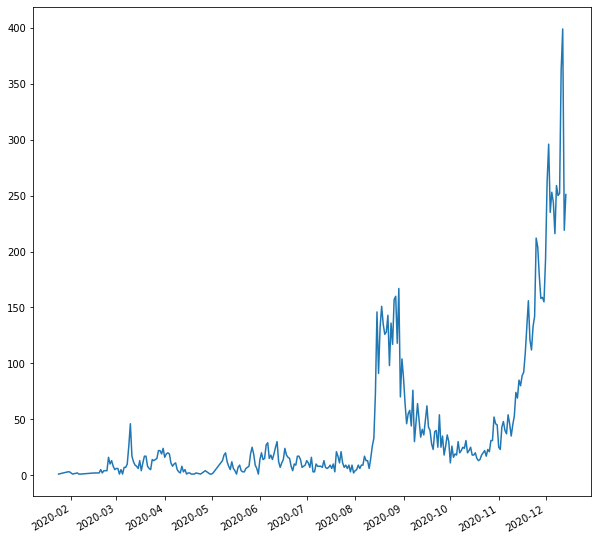

In [47]:
df['확진일자'].value_counts().plot(figsize=(10,10))

In [48]:
df['월일'] = df['확진일자'].astype(str).map(lambda x: x[-5:])

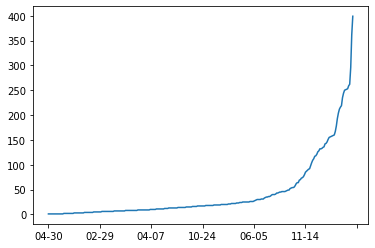

In [49]:
df['월일'].value_counts().sort_values().plot()

In [50]:
day_count = df['월일'].value_counts().sort_index()
day_count

01-24      1
01-30      3
01-31      3
02-02      1
02-05      2
        ... 
12-10    252
12-11    362
12-12    399
12-13    219
12-14    251
Name: 월일, Length: 297, dtype: int64

In [51]:
df['월일'].describe()

count     12657
unique      297
top       12-12
freq        399
Name: 월일, dtype: object

In [52]:
day_count.describe()

count    297.000000
mean      42.616162
std       65.047546
min        1.000000
25%        7.000000
50%       17.000000
75%       43.000000
max      399.000000
Name: 월일, dtype: float64

In [53]:
df[df['월일'] == '11-25']['거주지'].value_counts()

강서구     58
송파구     16
노원구     16
타시도     16
양천구     12
강남구     11
서초구      8
성동구      7
중랑구      7
성북구      7
강동구      5
마포구      5
동작구      5
강북구      5
동대문구     5
구로구      5
도봉구      5
은평구      4
용산구      4
영등포구     3
광진구      2
서대문구     2
기타       1
종로구      1
관악구      1
금천구      1
Name: 거주지, dtype: int64

In [54]:
import matplotlib.pyplot as plt

In [55]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

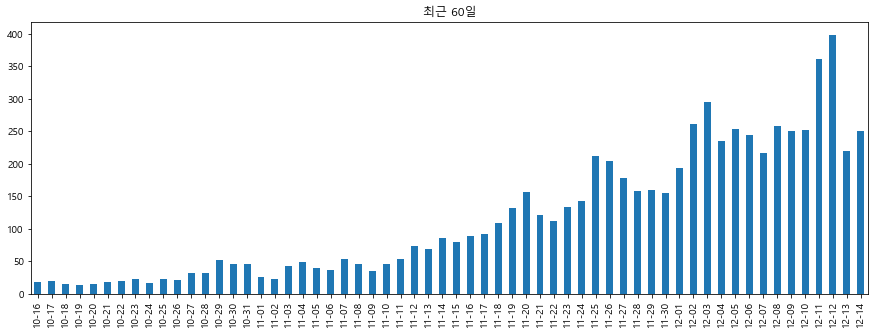

In [56]:
day_count[-60:].plot.bar(figsize=(15,5), title= '최근 60일')

In [57]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일
0,1912657,43494,12.14.,동대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14


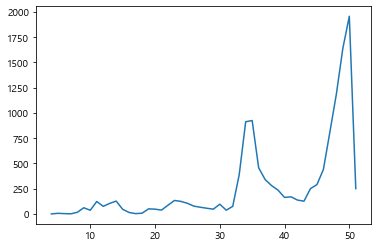

In [58]:
week_count = df['주'].value_counts().sort_index()
week_count.plot()

In [59]:
week_count_median = week_count.median()
week_count_mean = week_count.mean()
week_count_median, week_count_mean

(105.5, 263.6875)

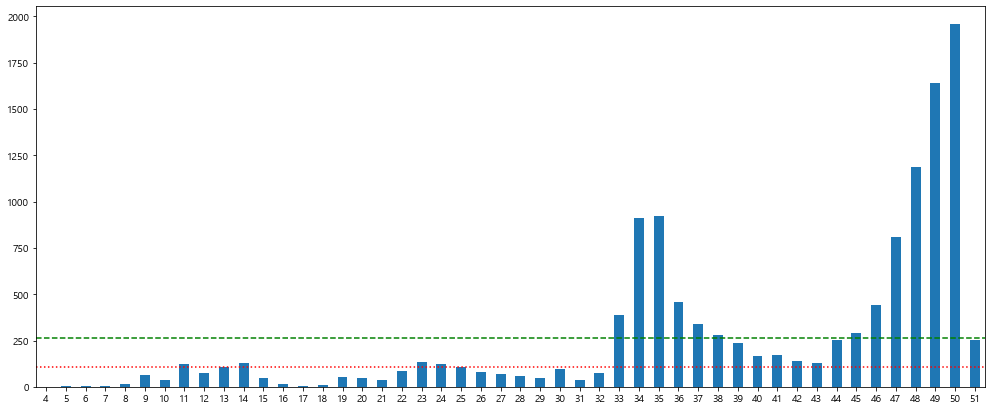

In [60]:
week_count.plot.bar(figsize=(17,7), rot=0)
plt.axhline(week_count_median, color='r', linestyle=':')
plt.axhline(week_count_mean, color='g', linestyle='--')

In [61]:
month_week_count = df.groupby(['월','주'])['연번'].count()

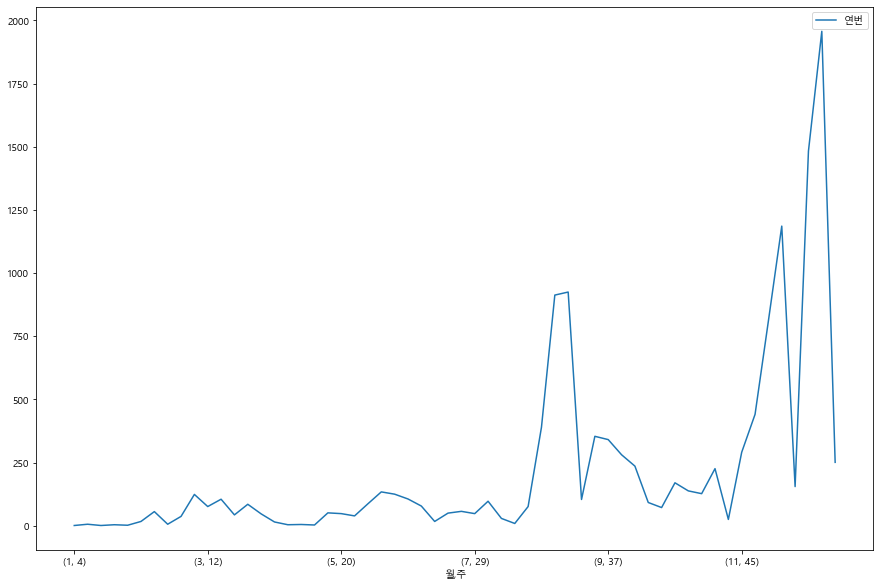

In [62]:
pd.DataFrame(month_week_count).plot(figsize=(15,10))

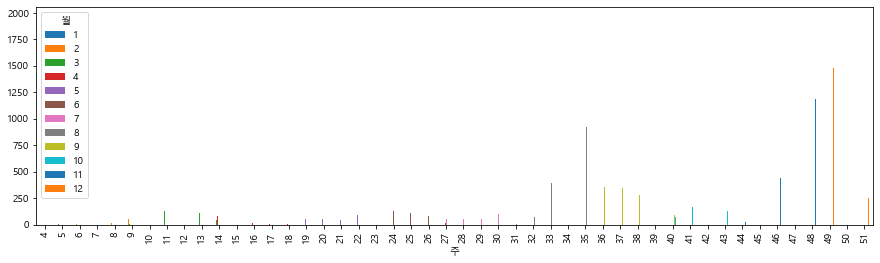

In [63]:
month_week_count.unstack().T.plot.bar(figsize=(15, 4))

In [64]:
day_count = df['확진일자'].value_counts().sort_index()

In [65]:
first_day = day_count.index[0]
last_day = day_count.index[-1]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-12-14 00:00:00'))

In [66]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14'],
              dtype='datetime64[ns]', length=326, freq='D')

In [67]:
df_days = pd.DataFrame({"연월일": days})
df_days.head()

,연월일
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [68]:
day_count = df["확진일자"].value_counts().sort_index()
day_count.head()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
Name: 확진일자, dtype: int64

In [69]:
df_day_count = day_count.reset_index()

In [70]:
df_day_count.columns = ["확진일자", "확진수"]
df_day_count.head(3)

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3


In [71]:
df_all_days = df_days.merge(df_day_count, 
                            left_on="연월일", 
                            right_on="확진일자", 
                            how="left")
df_all_days = df_all_days[["연월일", "확진수"]]
df_all_days.head()

,연월일,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [72]:
df_all_days["확진수"] = df_all_days["확진수"].fillna(0).astype(int)
df_all_days.head(3)

,연월일,확진수
0,2020-01-24,1
1,2020-01-25,0
2,2020-01-26,0


In [73]:
df_all_days["일자"] = df_all_days["연월일"].astype(str).map(lambda x : x[-5:])
df_all_days

,연월일,확진수,일자
0,2020-01-24,1,01-24
1,2020-01-25,0,01-25
2,2020-01-26,0,01-26
3,2020-01-27,0,01-27
4,2020-01-28,0,01-28
...,...,...,...
321,2020-12-10,252,12-10
322,2020-12-11,362,12-11
323,2020-12-12,399,12-12
324,2020-12-13,219,12-13


In [74]:
df_all_days["누적확진"] = df_all_days["확진수"].cumsum()
df_all_days[["확진수", "누적확진"]].head(10)

,확진수,누적확진
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,3,4
7,3,7
8,0,7
9,1,8


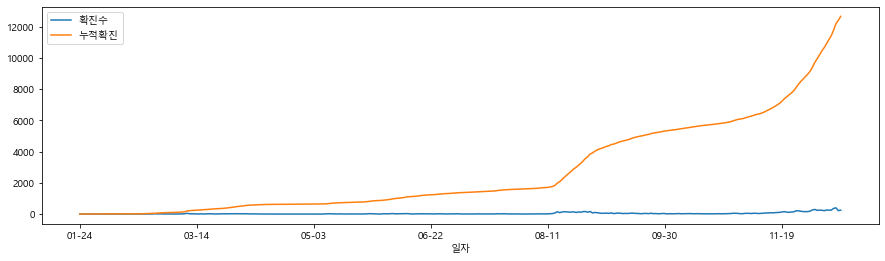

In [75]:
df_g = df_all_days[['일자','확진수','누적확진' ]]
df_g = df_g.set_index("일자")
df_g.plot(figsize=(15, 4))

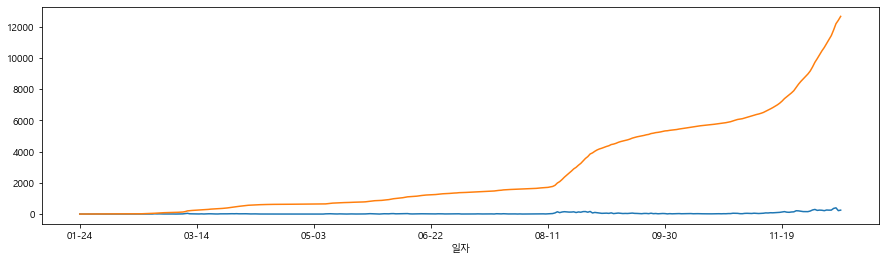

In [76]:
df_g["확진수"].plot()
df_g["누적확진"].plot(figsize=(15, 4))

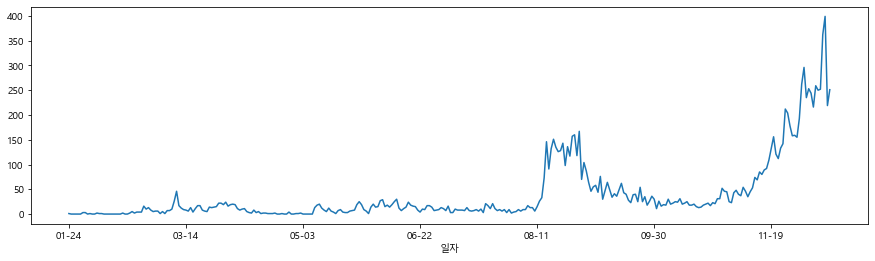

In [77]:
df_g["확진수"].plot(figsize=(15, 4))

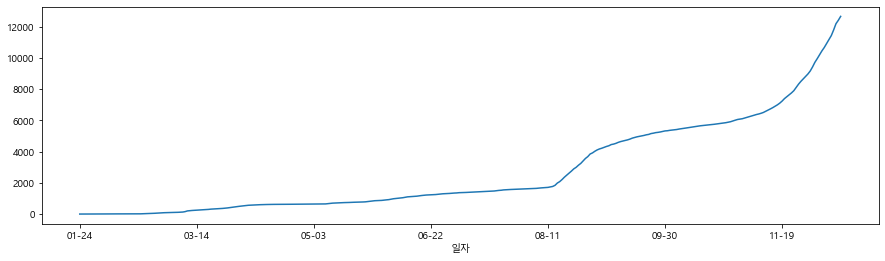

In [78]:
df_g["누적확진"].plot(figsize=(15, 4))

In [79]:
import numpy as np

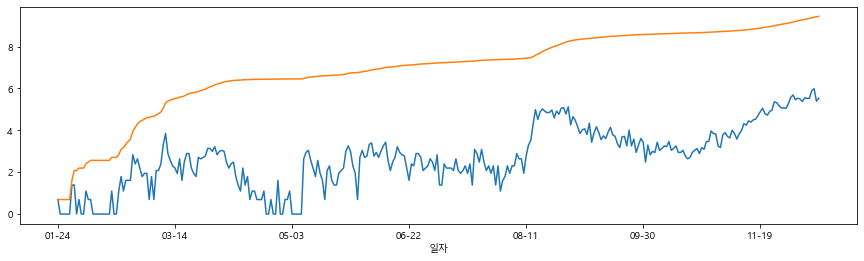

In [80]:
np.log(df_g["확진수"] + 1).plot()
np.log(df_g["누적확진"] + 1).plot(figsize=(15, 4))

In [81]:
df["요일"] = df["확진일자"].dt.dayofweek
df[["확진일자", "요일"]].head()

,확진일자,요일
0,2020-12-14,0
1,2020-12-14,0
2,2020-12-14,0
3,2020-12-14,0
4,2020-12-14,0


In [82]:
weekday_name = "월 화 수 목 금 토 일"
weekday_name = weekday_name.split()
weekday_name

['월', '화', '수', '목', '금', '토', '일']

In [83]:
df["요일명"] = df["요일"].map(lambda x :weekday_name[x])
df[["확진일자", "요일", "요일명"]].head()

,확진일자,요일,요일명
0,2020-12-14,0,월
1,2020-12-14,0,월
2,2020-12-14,0,월
3,2020-12-14,0,월
4,2020-12-14,0,월


In [84]:
g = df.groupby(["월", "요일명"])["연번"].count()
g.index

MultiIndex([( 1, '금'),
            ( 1, '목'),
            ( 2, '금'),
            ( 2, '목'),
            ( 2, '수'),
            ( 2, '월'),
            ( 2, '일'),
            ( 2, '토'),
            ( 2, '화'),
            ( 3, '금'),
            ( 3, '목'),
            ( 3, '수'),
            ( 3, '월'),
            ( 3, '일'),
            ( 3, '토'),
            ( 3, '화'),
            ( 4, '금'),
            ( 4, '목'),
            ( 4, '수'),
            ( 4, '월'),
            ( 4, '일'),
            ( 4, '토'),
            ( 4, '화'),
            ( 5, '금'),
            ( 5, '목'),
            ( 5, '수'),
            ( 5, '월'),
            ( 5, '일'),
            ( 5, '토'),
            ( 5, '화'),
            ( 6, '금'),
            ( 6, '목'),
            ( 6, '수'),
            ( 6, '월'),
            ( 6, '일'),
            ( 6, '토'),
            ( 6, '화'),
            ( 7, '금'),
            ( 7, '목'),
            ( 7, '수'),
            ( 7, '월'),
            ( 7, '일'),
            ( 7, '토'),
           

In [85]:
g = g.unstack()
g = g.fillna(0).astype(int)
g = g[weekday_name]
g

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


In [86]:
g.style.background_gradient(cmap="Greens")

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


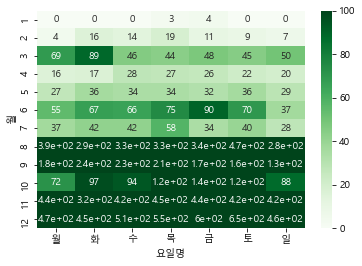

In [87]:
import seaborn as sns
sns.heatmap(g, cmap="Greens", annot=True, vmax=100)

In [88]:
gu_count = df["거주지"].value_counts()

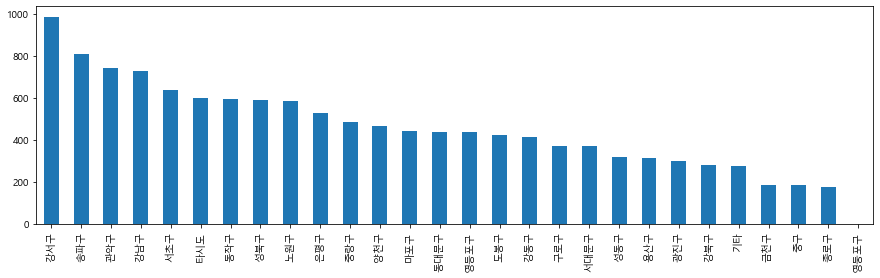

In [89]:
gu_count.plot.bar(figsize=(15, 4), rot=90)

In [90]:
seoul_gu = gu_count.head(25).index
seoul_gu

Index(['강서구', '송파구', '관악구', '강남구', '서초구', '타시도', '동작구', '성북구', '노원구', '은평구',
       '중랑구', '양천구', '마포구', '동대문구', '영등포구', '도봉구', '강동구', '구로구', '서대문구', '성동구',
       '용산구', '광진구', '강북구', '기타', '금천구'],
      dtype='object')

In [91]:
df[~df["거주지"].isin(seoul_gu)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명
11,1912646,44166,12.14.,중구,-,감염경로 조사중,NaN,NaN,2020-12-14,12,51,12-14,0,월
83,1912574,43696,12.14.,중구,-,타시도 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월
84,1912573,43695,12.14.,중구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월
85,1912572,43694,12.14.,중구,-,감염경로 조사중,NaN,NaN,2020-12-14,12,51,12-14,0,월
91,1912566,43932,12.14.,종로구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12643,1914,30,2.16.,종로구,-,#29 접촉,퇴원,NaN,2020-02-16,2,7,02-16,6,일
12644,1913,29,2.16.,종로구,-,#83 접촉,<b class='status2'>사망</b>,사망,2020-02-16,2,7,02-16,6,일
12650,197,11,1.31.,종로구,-,#6 접촉,퇴원,NaN,2020-01-31,1,5,01-31,4,금
12651,196,10,1.31.,종로구,-,#6 접촉,퇴원,NaN,2020-01-31,1,5,01-31,4,금


In [92]:
df["지역"] = df["거주지"]
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
0,1912657,43494,12.14.,동대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,동대문구


In [93]:
df.loc[~df["거주지"].isin(seoul_gu), "지역"] = "타지역"

In [94]:
df["지역"] = df["거주지"].map(lambda x : x if x in seoul_gu else "타지역")
df.tail(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
12656,191,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-24,1,4,01-24,4,금,강서구


In [95]:
def find_seoul_gu(x):
    if x in seoul_gu:
        return x
    else:
        return "타지역"

In [96]:
df["지역"] = df["거주지"].apply(find_seoul_gu)

In [97]:
df["지역"] = df["거주지"].map(find_seoul_gu)

In [98]:
df.loc[df["지역"] == "타지역", "거주지"].unique()

array(['중구', '종로구', '영둥포구'], dtype=object)

In [99]:
seoul_gu_count = df["지역"].value_counts()

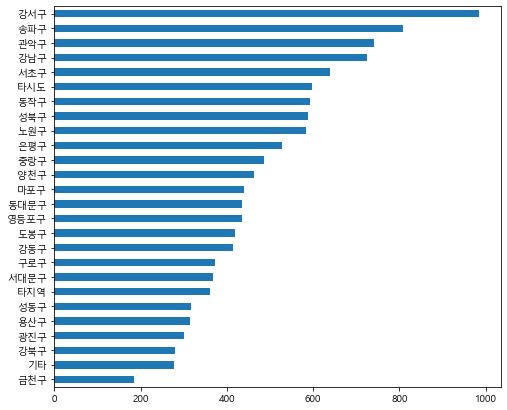

In [100]:
seoul_gu_count.sort_values().plot.barh(figsize=(8, 7))

In [101]:
df["접촉력"].value_counts().head(10)

기타 확진자 접촉          3060
감염경로 조사중           1777
성북구 사랑제일교회 관련       641
타시도 확진자 접촉          637
확인 중                586
해외 접촉 추정            404
강서구 댄스교습관련 시설       207
종로구 소재 파고다타운 관련     175
해외 유입               160
강서구 교회 관련           144
Name: 접촉력, dtype: int64

In [102]:
df["접촉력"].value_counts(normalize=True).head(10) * 100

기타 확진자 접촉          24.176345
감염경로 조사중           14.039662
성북구 사랑제일교회 관련       5.064391
타시도 확진자 접촉          5.032788
확인 중                4.629849
해외 접촉 추정            3.191910
강서구 댄스교습관련 시설       1.635459
종로구 소재 파고다타운 관련     1.382634
해외 유입               1.264123
강서구 교회 관련           1.137710
Name: 접촉력, dtype: float64

In [103]:
df["접촉력"].unique()

array(['기타 확진자 접촉', '동부구치소 관련', '강남구 소재 공기업 관련', '감염경로 조사중',
       '용산구 소재 건설현장 관련', '타시도 확진자 접촉', '강서구 교회 관련', '해외유입',
       '강서구 댄스교습 관련시설', '종로구 소재 파고다타운 관련', '강서구 댄스교습 연관 병원 관련', '해외 유입',
       '강남구 어학원 관련Ⅰ', '구로구 고등학교 관련', '노원구 체육시설 관련', '은평구 소재 역사관련',
       '마포구 홈쇼핑회사 관련', '동대문구 지혜병원 관련', '동작구 사우나 관련', '서초구 소재 병원',
       '서초구 사우나Ⅱ 관련', '강서구 댄스교습관련 시설', '노원구 의료기관 관련', '강서구 소재 병원관련(11월)',
       '성동구 병원 관련', '중구 소재 콜센터(한전SCS) 관련', '동대문구 체육시설 관련', '서초구 건설회사 관련',
       '소규모 지인모임', '중구 소재 시장(남대문시장) 관련', '강서구 소재 댄스교습시설 연관 병원',
       '영등포구 소재 콜센터 관련', '중랑구 실내 체육시설Ⅱ관련', '성북구 소재 공연연습실', '중구 콜센터Ⅱ 관련',
       '노원구 소재 회사 관련', '마포구 빌딩 관련', '제주여행(퇴직교사) 관련', '노원구 소재 교회 관련]',
       '송파구 사우나 관련', '어플 소모임 관련', '어플소모임 관련', '강서구 소재 교회 관련',
       '중랑구 실내 체육시설 Ⅱ 관련', '강서구 댄스교습관련 시설 관련', '종로구 소재 파고다 타운 관련',
       '강남구 소재 마사지샵 관련', '중랑구 소재 병원 관련', '구로구 소재 고등학교 관련', '저축 금융컨설팅 관련',
       '동창 운동 모임 관련', '성동구 소재 병원 관련', '송파구 탁구클럽관련', '영등포구 소재 교회 관련',
       '강남구 음식점Ⅱ 관련', '구로구 소재 보험회사 관련', '노원구청 

In [104]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [105]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [106]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

In [107]:
contact_count = df["접촉력"].value_counts()
contact_count

기타 확진자 접촉        3060
감염경로 조사중         1777
성북구 사랑제일교회 관련     641
타시도 확진자 접촉        637
확인 중              628
                 ... 
강서구 직장 관련           1
도봉구 소재 종교시설         1
제주도 퇴직교사 모임         1
#9912 접촉            1
구로구소재 고등학교 관련       1
Name: 접촉력, Length: 469, dtype: int64

In [108]:
df["접촉력"].value_counts(normalize=True).head(15) * 100 

기타 확진자 접촉          24.176345
감염경로 조사중           14.039662
성북구 사랑제일교회 관련       5.064391
타시도 확진자 접촉          5.032788
확인 중                4.961681
해외 접촉 추정            3.191910
강서구 댄스교습관련 시설       1.635459
종로구 소재 파고다타운 관련     1.382634
해외 유입               1.264123
강서구 교회 관련           1.137710
이태원 클럽 관련           1.098207
8.15서울도심집회          0.995497
리치웨이 관련             0.940191
서초구 사우나Ⅱ 관련         0.624161
서초구 사우나 관련          0.616260
Name: 접촉력, dtype: float64

In [109]:
contact_count.head(15)

기타 확진자 접촉          3060
감염경로 조사중           1777
성북구 사랑제일교회 관련       641
타시도 확진자 접촉          637
확인 중                628
해외 접촉 추정            404
강서구 댄스교습관련 시설       207
종로구 소재 파고다타운 관련     175
해외 유입               160
강서구 교회 관련           144
이태원 클럽 관련           139
8.15서울도심집회          126
리치웨이 관련             119
서초구 사우나Ⅱ 관련          79
서초구 사우나 관련           78
Name: 접촉력, dtype: int64

In [110]:
top_contact = contact_count.head(15).index
top_contact

Index(['기타 확진자 접촉', '감염경로 조사중', '성북구 사랑제일교회 관련', '타시도 확진자 접촉', '확인 중',
       '해외 접촉 추정', '강서구 댄스교습관련 시설', '종로구 소재 파고다타운 관련', '해외 유입', '강서구 교회 관련',
       '이태원 클럽 관련', '8.15서울도심집회', '리치웨이 관련', '서초구 사우나Ⅱ 관련', '서초구 사우나 관련'],
      dtype='object')

In [111]:
df_top_contact = df[df["접촉력"].isin(top_contact)]

In [112]:
contact_group = df_top_contact.groupby(["접촉력", "월"])["연번"].count().unstack()
contact_group = contact_group.fillna(0).astype(int)
contact_group = contact_group.sort_values(by=[5, 6, 3, 4, 7, 3], ascending=False)
contact_group.style.background_gradient()

월,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,
이태원 클럽 관련,0,0,0,133,6,0,0,0,0,0,0
해외 접촉 추정,1,121,112,24,23,39,47,23,14,0,0
확인 중,10,28,9,12,75,49,444,1,0,0,0
타시도 확진자 접촉,5,17,4,2,6,16,92,76,34,128,257
리치웨이 관련,0,0,0,0,119,0,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,1,422,309,116,730,1482
8.15서울도심집회,0,0,0,0,0,0,113,13,0,0,0
감염경로 조사중,0,0,0,0,0,0,11,284,125,511,846
강서구 교회 관련,0,0,0,0,0,0,0,0,0,0,144


In [113]:
contact_group.loc[['해외 접촉 추정', '확인 중']]

월,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,
해외 접촉 추정,1,121,112,24,23,39,47,23,14,0,0
확인 중,10,28,9,12,75,49,444,1,0,0,0


In [114]:
df_unknown = df[df["접촉력"] == "확인 중"].copy()
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
8699,193958,20163,8.31.,양천구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,양천구
8700,193957,20141,8.31.,은평구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,은평구
8701,193956,20159,8.31.,용산구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,용산구
8705,193952,20130,8.31.,도봉구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,도봉구
8711,193946,20039,8.31.,타시도,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,타시도


In [115]:
df_unknown.shape

(628, 15)

In [116]:
all_weekly_case = df["주"].value_counts()
all_weekly_case.head()

50    1957
49    1638
48    1186
35     925
34     913
Name: 주, dtype: int64

In [117]:
unknown_weekly_case = df_unknown["주"].value_counts()
unknown_weekly_case.head()

35    224
34    170
24     25
33     25
23     18
Name: 주, dtype: int64

In [118]:
all_unknown = pd.DataFrame({"주별 확진" : all_weekly_case, 
                            "감염경로 불명 확진": unknown_weekly_case})
all_unknown = all_unknown.fillna(0)

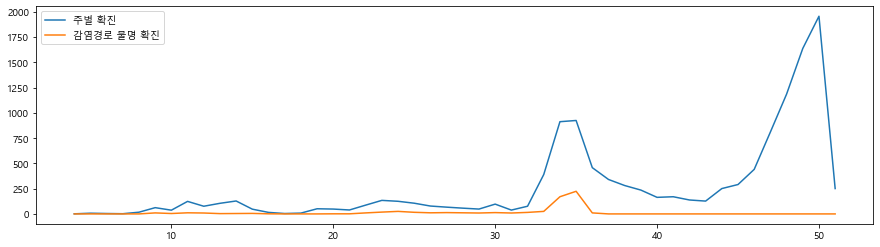

In [119]:
all_unknown.plot(figsize=(15, 4))

In [120]:
all_unknown["확인중 비율"] = (all_unknown["감염경로 불명 확진"] / all_unknown["주별 확진"]) * 100
all_unknown.sort_values(by="확인중 비율", ascending=False).head(10)

,주별 확진,감염경로 불명 확진,확인중 비율
35,925,224.0,24.216216
31,38,9.0,23.684211
24,125,25.0,20.000000
32,76,15.0,19.736842
27,67,13.0,19.402985
28,57,11.0,19.298246
29,48,9.0,18.750000
34,913,170.0,18.619934
9,62,10.0,16.129032
25,106,16.0,15.094340


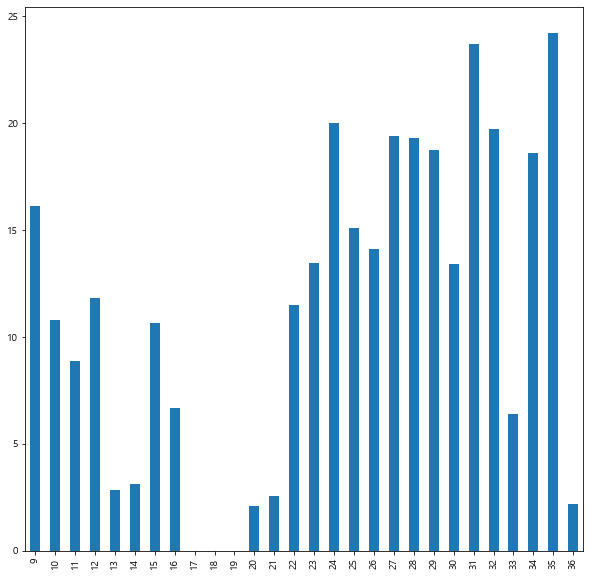

In [121]:
all_unknown['확인중 비율'][5:33].plot.bar(figsize=(10,10))

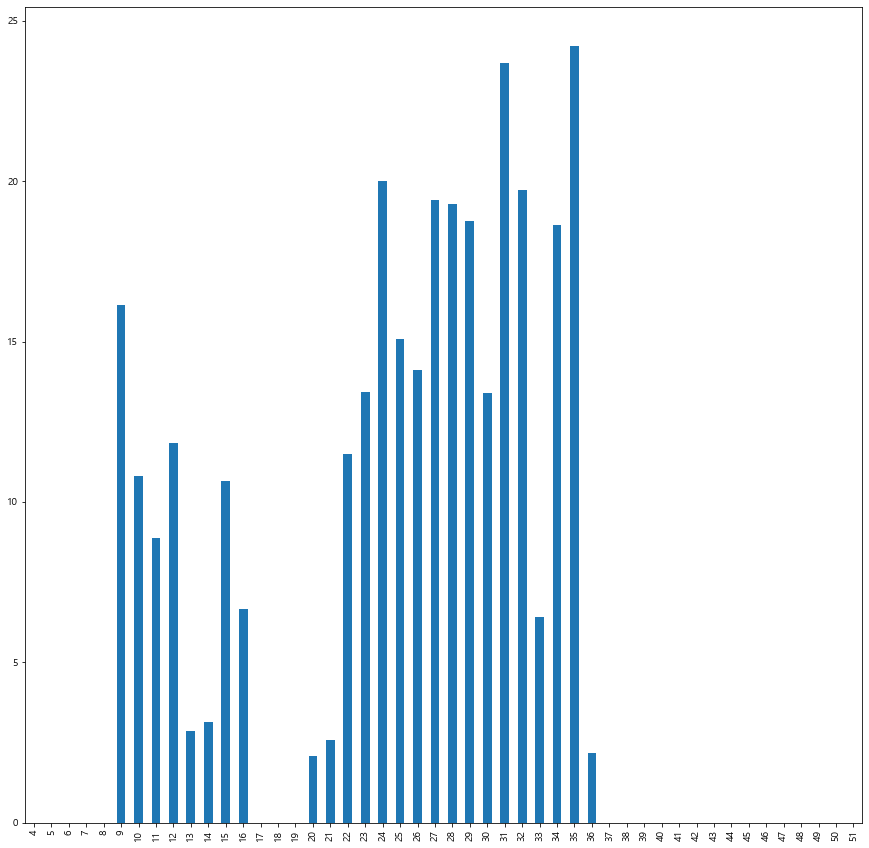

In [122]:
all_unknown['확인중 비율'].plot.bar(figsize=(15,15))

In [123]:
w = pd.DataFrame(df)
w.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
0,1912657,43494,12.14.,동대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,동대문구
1,1912656,43495,12.14.,관악구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,관악구
2,1912655,44350,12.14.,강서구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,강서구
3,1912654,44335,12.14.,광진구,-,동부구치소 관련,NaN,NaN,2020-12-14,12,51,12-14,0,월,광진구
4,1912653,44334,12.14.,광진구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,광진구


In [124]:
w['접촉력'].value_counts().head(20)

기타 확진자 접촉                  3060
감염경로 조사중                   1777
성북구 사랑제일교회 관련               641
타시도 확진자 접촉                  637
확인 중                        628
해외 접촉 추정                    404
강서구 댄스교습관련 시설               207
종로구 소재 파고다타운 관련             175
해외 유입                       160
강서구 교회 관련                   144
이태원 클럽 관련                   139
8.15서울도심집회                  126
리치웨이 관련                     119
서초구 사우나Ⅱ 관련                  79
서초구 사우나 관련                   78
동대문구 에이스희망케어센터 관련            71
도봉구 다나병원                     68
강남구 헬스장 관련                   66
구로구 콜센터 관련                   60
동대문구 고등학교(마포구 홍대 새교회관련)      60
Name: 접촉력, dtype: int64

In [125]:
w['지역'].value_counts()

강서구     985
송파구     808
관악구     742
강남구     725
서초구     638
타시도     597
동작구     592
성북구     589
노원구     583
은평구     528
중랑구     486
양천구     463
마포구     440
동대문구    436
영등포구    436
도봉구     420
강동구     415
구로구     372
서대문구    369
타지역     360
성동구     317
용산구     314
광진구     300
강북구     280
기타      277
금천구     185
Name: 지역, dtype: int64

In [126]:
w['접촉력'].value_counts().head(20)

기타 확진자 접촉                  3060
감염경로 조사중                   1777
성북구 사랑제일교회 관련               641
타시도 확진자 접촉                  637
확인 중                        628
해외 접촉 추정                    404
강서구 댄스교습관련 시설               207
종로구 소재 파고다타운 관련             175
해외 유입                       160
강서구 교회 관련                   144
이태원 클럽 관련                   139
8.15서울도심집회                  126
리치웨이 관련                     119
서초구 사우나Ⅱ 관련                  79
서초구 사우나 관련                   78
동대문구 에이스희망케어센터 관련            71
도봉구 다나병원                     68
강남구 헬스장 관련                   66
구로구 콜센터 관련                   60
동대문구 고등학교(마포구 홍대 새교회관련)      60
Name: 접촉력, dtype: int64

In [130]:
ww = w[w['접촉력'] == '기타 확진자 접촉']
ww.shape

(3060, 15)

In [131]:
ww.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
0,1912657,43494,12.14.,동대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,동대문구
1,1912656,43495,12.14.,관악구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,관악구
2,1912655,44350,12.14.,강서구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,강서구
4,1912653,44334,12.14.,광진구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,광진구
8,1912649,44156,12.14.,구로구,-,기타 확진자 접촉,NaN,NaN,2020-12-14,12,51,12-14,0,월,구로구


In [134]:
ww['거주지'].value_counts().head()

송파구    235
강서구    204
강남구    187
관악구    186
서초구    163
Name: 거주지, dtype: int64

In [135]:
ww['요일명'].value_counts()

토    523
일    465
수    464
월    436
금    432
목    425
화    315
Name: 요일명, dtype: int64

In [ ]:
xx